# UM4MA379, Statistique Computationnelle, 2025-2026

Sorbonne Université, Master 1

Cours :  A. Guyader<br>
TP : M. Sangnier

## TP 1 : Simulation Monte-Carlo

# Table of contents
1. [Exercice 1 : Lien géométrique/exponentielle](#part1)
1. [Exercice 2 : Nul n'est censé ignorer la loi normale ](#part2)
1. [Exercice 3: Monte-Carlo standard versus échantillonnage préférentiel ](#part3)
1. [Exercice 4 : Here comes trouble](#part4)


In [1]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import matplotlib.pyplot as plt  # Plots

# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

# Exercice 1 : Lien géométrique/exponentielle <a id="part1"></a>
>Soient $0<p<1$ et $X \sim \text{Geo}_{\mathbb N^*}(p)$.
>
>**Question 1.** Soit $p=1/3$. Grâce à la classe `geom` du module `stats`, générer un échantillon de grande taille $n$ et chronométrer la durée d'exécution (on pourra utiliser la fonction `perf_counter` du module `time`).

In [53]:
from time import perf_counter
p = 1/3
n=100000000

start = perf_counter()
X1 = stats.geom.rvs(p, size=n)
end = perf_counter()
print(f"Échantillon généré:{X1[:10]}") 
print(f"Durée de la génération: {end-start}")

Échantillon généré:[1 3 8 1 3 3 1 2 4 1]
Durée de la génération: 3.5851668000032078


>**Question 2.** Soit $(B_k)_{k\geq 1}$ une suite de variables i.i.d. selon une loi de Bernoulli $\text{Ber}(p)$. Comment obtenir une variable $X$ de loi géométrique $\text{Geo}_{\mathbb N^*}(p)$ à partir de celles-ci ? Implémenter cette méthode. Que se passe-t-il lorsque $p$ est proche de 0 ?

**Réponse :**
…

In [33]:
def geometrique(p):
    c = 0
    Pos = 0
    while(not Pos):
        Pos = stats.bernoulli.rvs(p)
        c+=1
    return c

p = [1/2, 1/4, 1/8, 0.001]
for i in p:
    start = perf_counter()
    y = geometrique(i)
    end = perf_counter()
    print(y, end-start)


2 0.0001841000048443675
9 0.0004197000016574748
10 0.0003068000005441718
4713 0.11226330000499729


>**Question 3.** Soit $p=1/3$. Implémenter la méthode précédente pour générer un échantillon de grande taille $n$, chronométrer la durée d'exécution et comparer à la question 1.

**Réponse :**
…

In [38]:
p = 1/3
n = 1000

start = perf_counter()
X2 = []
for i in range(n):
    c = 0
    Pos = 0
    while(not Pos):
        c+=1
        Pos = stats.bernoulli.rvs(p)
    X2.append(c)

end = perf_counter()
print(f"Échantillon à partir de Bernouilli {X2[:10]}")
print(f"Durée de la génération: {end-start}")

Échantillon à partir de Bernouilli [1, 1, 2, 5, 2, 3, 4, 4, 7, 10]
Durée de la génération: 0.08471589999680873


>**Question 4.** Soient $\lambda>0$, $T \sim \text{Exp}(\lambda)$
>et $X=\lceil T\rceil$ la partie entière par excès de $T$ (i.e. $\lceil 0.4\rceil =1$ et $\lceil 2\rceil =2$). Quelles valeurs peut prendre $X$ ? Avec quelles probabilités ? En déduire un moyen de générer une loi géométrique $\text{Geo}_{\mathbb N^*}(p)$. 

**Réponse :**
…

In [ ]:
#x peut prendre les valeurs 1,2,3,4....
#P(X = n) = P(n-1 < T <= n) = exp(-(n-1)*lamba) - exp(-n*lambda) = exp(-lambda * n)(1-exp(lambda))
#on a que pour lambda = -ln(1-p), X suit une loi Geom(p). Donc on simule une exponentielle de parametre -ln(1-p) et on prend la partie entiere,
#en obtenant des simulations des geometriques de parametre p

>**Question 5.** Soit $p=1/3$. Implémenter la méthode précédente pour générer un échantillon de grande taille $n$, chronométrer la durée d'exécution et comparer à la question 1. Que constatez-vous ?

**Réponse :**
…

In [54]:
p = 1/3
l = -np.log(1-p)
n = 100000000
start = perf_counter()
#on simule une exponentielle en prenant des uniformes et en faisant la transformation -ln(U)/lambda
S = stats.uniform.rvs(0,1,size=n)
G = np.ceil(-np.log(S)/l).astype(int)
end = perf_counter()
print(f"Échantillonage avec utilisation d'exponentielles: {G[:10]}")
print(f"Durée de la génération: {end-start}")

Échantillonage avec utilisation d'exponentielles: [ 2  4  4  5  4  7 12  3  5  2]
Durée de la génération: 3.196570200001588


>**Question 6.** Que donne la méthode d'inversion ?

**Réponse :**
…

# Exercice 2 : Nul n'est censé ignorer la loi normale  <a id="part2"></a>


>**Question 1.**
Soit $(U,V)$ un couple de variables i.i.d. de loi uniforme sur $[0,1]$. Montrer que les variables $X$ et $Y$ définies par
$$\left\{ \begin{array}{l}
           X=\sqrt{-2\log U}\times\cos(2\pi V)\\
           Y=\sqrt{-2\log U}\times\sin(2\pi V)\\
          \end {array}\right .$$
sont i.i.d. gaussiennes centrées réduites.

**Réponse :**
…

 >**Question 2.** Algorithme de Box-Muller : estimer le temps nécessaire pour simuler $n=10^7$  gaussiennes avec la méthode de la question précédente. Le comparer à celui mis par la fonction `norm` du module `stats`.

**Réponse :**
…

In [ ]:
# Answer

>**Question 3.**
Déterminer la loi du couple de variables aléatoires $(W, Z) = \left( \sqrt{U} \cos(2 \pi V), \sqrt{U} \sin(2 \pi V) \right)$.
Comment peut-on simuler cette loi par méthode du rejet ?

**Réponse :**
…

**Réponse :**
…

In [ ]:
# Answer

>**Question 4.**
Méthode polaire de Marsaglia : déduire de la question précédente une nouvelle méthode de simulation de la loi $\mathcal N(0, 1)$.
Quel est son avantage par rapport à l'algorithme de Box-Muller.
Quel est son défaut ?

**Réponse :**
…

In [ ]:
# Answer

>**Question 5.** Simuler et représenter $n=1000$ réalisations d'une loi normale multivariée ${\cal N}(m,\Gamma)$ avec
$$m=\left[\begin{array}{l}
2\\
1\end{array}\right]\hspace{1cm}\mbox{et}\hspace{1cm}\Gamma=\left[\begin{array}{ll}
1&1\\
1&4\end{array}\right].$$
Retrouver approximativement $m$ et $\Gamma$ à partir de cet échantillon.

In [ ]:
# Answer

# Exercice 3: Monte-Carlo standard versus échantillonnage préférentiel  <a id="part3"></a>
>On veut retrouver par simulation la valeur de $p=\mathbb{P}(X\geq 6)$ avec $X\sim{\cal N}(0,1)$.
>
>**Question 1.** Déterminer $p$ grâce à la classe `norm` de `scipy.stats`.

In [ ]:
# Answer
norm = stats.norm()

threshold = 6

# Compléter

# Fin compléter

print('p =', p)

>**Question 2.** Estimer $p$ via l'estimateur Monte-Carlo standard basé sur la simulation de $n$ variables gaussiennes avec $n$ le plus grand possible.

**Réponse :**
…

In [ ]:
# Answer
n = 10**8  # int(1e8)

# Compléter

# Fin compléter

print('Estimateur Monte-Carlo standard :', estMC)

>**Question 3.** Si $T \sim \text{Exp}(1)$, donner la densité de l'exponentielle translatée $Y = 6+T$.
>En déduire un estimateur d'échantillonnage préférentiel pour $p$, ainsi qu'un intervalle de confiance asymptotiques à 95% pour $n=500$.

**Réponse :**
…

In [ ]:
# Answer
exp = stats.expon(loc=threshold)
level = 0.05
n = 500

# Compléter

# Fin compléter

print(f"Estimateur : {est:1.2e}")
print(f"Intervalle de confiance asymptotique : [{est-ic_bound:1.2e},{est+ic_bound:1.2e}]")

>**Question 4.** Tracer l'évolution de l'estimateur et des intervalles de confiance pour $n$ allant par exemple de 1 à 500.

**Remarque :** Le code qui suit donne l'évolution de l'estimateur et des intervalles de confiance. Bien entendu, comme ce sont des intervalles de confiance asymptotiques, ceux-ci n'ont aucun sens lorsque $n$ est petit. Ce phénomène se reflète d'ailleurs sur la figure puisqu'on voit que ces intervalles se stabilisent dès que $n$ devient supérieur à 100 environ.

In [ ]:
# Answer
exp = stats.expon(loc=threshold)
level = 0.05
n = 500

# Compléter

# Fin compléter

fig = plt.figure()
plt.plot(n_range, est, label="$\\hat{{p}}_n$")
plt.fill_between(n_range, est+ic_bound, est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.axhline(1 - norm.cdf(threshold), color='red', label=f"$\\mathbb{{P}}(\\mathcal{{N}}(0, 1) \\geqslant {threshold})$")
plt.ylim(.2*p, 1.8*p)
plt.legend();

Exemple :

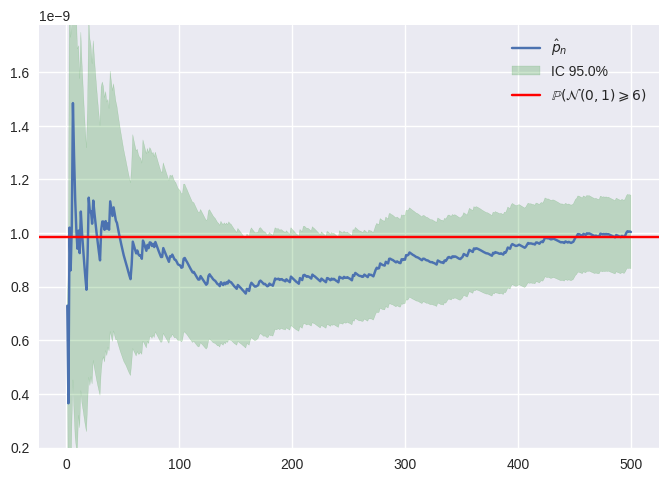

In [17]:
fig

>**Question 5.** Faire de même en considérant pour loi d'échantillonnage une loi gaussienne $Y\sim\mathcal{N}(6,1)$.

**Réponse :**
…

In [ ]:
# Answer

>**Question 6.** Des deux dernières méthodes, laquelle choisissez-vous ?

**Réponse :**
…

In [ ]:
# Answer

# Exercice 4 : Here comes trouble <a id="part4"></a>
>On veut retrouver par simulation la valeur de $p=\mathbb{P}(X\geq 10)$ avec $X$ qui suit une loi de Pareto de paramètres $(1,3)$, c'est-à-dire de densité $f(x)=3 x^{-4}\mathbf{1}_{x\geq 1}$.
>
>**Question 1.** Déterminer la valeur de $p$ par le calcul.

**Réponse :**
…

>**Question 2.** Proposer une méthode de simulation par inversion pour simuler suivant cette loi de Pareto.

**Réponse :**
…

In [ ]:
# Answer
unif = stats.uniform()
pareto = stats.pareto(b=3)

n = 1000

# Compléter

# Fin compléter

t = np.linspace(0, 4, num=500)
plt.hist(x, label='Échantillon', **nice_hist)
plt.plot(t, pareto.pdf(t), label='Densité')
plt.xlim((0, t.max()));

>**Question 3.** Illustrer la convergence de l'estimateur Monte-Carlo standard, ainsi que les intervalles de confiance asymptotiques à 95% (on pourra utiliser le simulateur de la question précédente ou `stats.pareto`).

In [ ]:
# Answer

>**Question 4.** Utiliser une loi exponentielle translatée pour estimer $p$ par échantillonnage préférentiel, représenter la convergence, les intervalles de confiance, et expliquer ce qui se passe.

**Réponse :**
…

In [ ]:
# Answer